In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop("Id",axis=1,inplace=True)


In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df1=df[df.Species!="Iris-setosa"]

In [7]:
df1["Species"].map({"Iris-versicolor":0,"Iris-virginica":1})

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 100, dtype: int64

In [8]:
df1["Species"]=df1["Species"].map({"Iris-versicolor":0,"Iris-virginica":1})

<ipython-input-8-ad3e05251f29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Species"]=df1["Species"].map({"Iris-versicolor":0,"Iris-virginica":1})


In [9]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [10]:
#Splitting data 
#split the dataset 

X=df1.iloc[:,:-1] #except target variable means independent features
y=df1.iloc[:,-1] #only target variable means dependent fetaures

In [11]:
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 100, dtype: int64

In [13]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 4)
(25, 4)
(75,)
(25,)


In [15]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [16]:
#from sklearn.model_selection import GridSearchCV

lg.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred=lg.predict(X_test) 

In [18]:
#Predicting the test cases
pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': lg.predict( X_test ) } )

In [19]:
pred

,actual,predicted
133,1,1
103,1,1
120,1,1
95,0,0
94,0,0
89,0,0
72,0,0
130,1,1
60,0,0
50,0,0


In [20]:
df1.iloc[83]

SepalLengthCm    6.3
SepalWidthCm     2.8
PetalLengthCm    5.1
PetalWidthCm     1.5
Species          1.0
Name: 133, dtype: float64

In [21]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( pred.actual,
                            pred.predicted)
cm

array([[13,  1],
       [ 1, 10]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

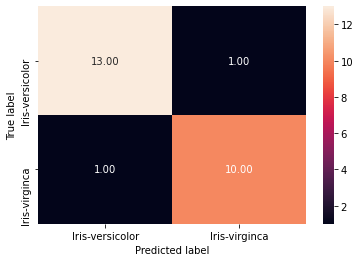

In [22]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Iris-versicolor", "Iris-virginca"] , yticklabels = ["Iris-versicolor", "Iris-virginca"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [23]:
score = metrics.accuracy_score( pred.actual, pred.predicted )
round( float(score), 2 )

0.92